---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 8: 2D Burger's Equation

---

Again, **Burger's equation** it is a simplification of Navier-Stokes equations, neglecting pressure gradients and external forces. Also it's interesting because there are **many known analytical solutions**.

In 2D we have a **pair of coupled PDE's**

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

**Following the same discretization** steps used before we get

$$ \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y}= \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)$$

$$ \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} =\nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
$$

then **solving for the unknowns, $u_{n+1}^{i,j}$ and $v_{n+1}^{i,j}$**

$$u_{i,j}^{n+1} =  u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)$$

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import FormatStrFormatter

In [7]:
x_points = 41                                 # Number of x grid points
y_points = 41                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.25                                   # CFL number
nu = 0.01                                      # Diffusion coefficient
dt = sigma * ((dx * dy) / nu)                  # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
u_n = u.copy()

v = np.ones((y_points, x_points)) 
v_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2
v[int(0.5/dy):int((1.5/dy) + 1), int(0.5/dx):int((1.5/dx) + 1)] = 2

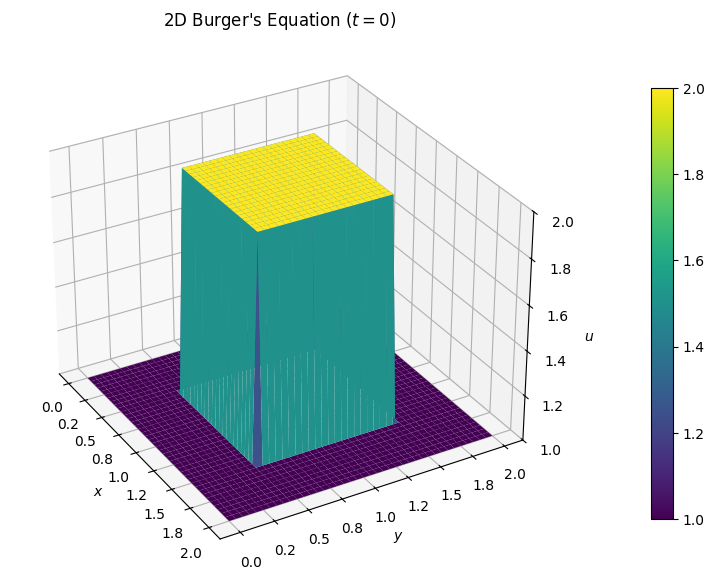

In [8]:
fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(r"2D Burger's Equation ($t=0$)")
axis.set_zlim(1, 2)
axis.set_ylabel('$y$')
axis.set_xlabel('$x$')
axis.set_zlabel('$u$')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

Now, the iteration process

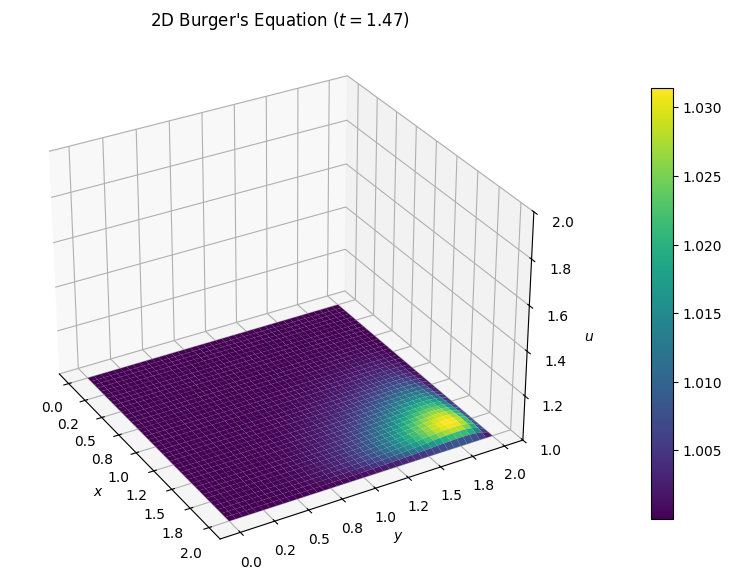

In [42]:
x_points = 41                                 # Number of x grid points
y_points = 41                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.15                                   # CFL number
nu = 0.07                                      # Diffusion coefficient
dt = sigma * ((dx * dy) / nu)                  # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
u_n = u.copy()

v = np.ones((y_points, x_points)) 
v_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1/dy) + 1), int(0.5/dx):int((1/dx) + 1)] = 2
v[int(0.5/dy):int((1/dy) + 1), int(0.5/dx):int((1/dx) + 1)] = 2

for n in range(time_steps):
    u_n = u.copy()
    v_n = v.copy()

    u[1:-1, 1:-1] = (u_n[1:-1, 1:-1] 
                                    - ((dt/dx) * u_n[1:-1, 1:-1] * (u_n[1:-1, 1:-1] - u_n[1:-1, :-2])) 
                                    - ((dt/dy) * v_n[1:-1, 1:-1] * (u_n[1:-1, 1:-1] - u_n[:-2, 1:-1]))
                                    + (nu * (dt/dx**2) * (u_n[1:-1, 2:] - 2*u_n[1:-1, 1:-1] + u_n[1:-1, :-2]))
                                    + (nu * (dt/dy**2) * (u_n[2:, 1:-1] - 2*u_n[1:-1, 1:-1] + u_n[:-2, 1:-1])))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

    v[1:-1, 1:-1] = (v_n[1:-1, 1:-1] 
                                    - ((dt/dx) * u_n[1:-1, 1:-1] * (v_n[1:-1, 1:-1] - v_n[1:-1, :-2])) 
                                    - ((dt/dy) * v_n[1:-1, 1:-1] * (v_n[1:-1, 1:-1] - v_n[:-2, 1:-1]))
                                    + (nu * (dt/dx**2) * (v_n[1:-1, 2:] - 2*v_n[1:-1, 1:-1] + v_n[1:-1, :-2]))
                                    + (nu * (dt/dy**2) * (v_n[2:, 1:-1] - 2*v_n[1:-1, 1:-1] + v_n[:-2, 1:-1])))
    v[0, : ] = 1
    v[-1, : ] = 1
    v[ : , 0] = 1
    v[ : , -1] = 1

fig, axis = plt.subplots(subplot_kw={"projection":"3d"}, dpi=100, figsize= (11,7))
ax = axis.plot_surface(X, Y, u[:], cmap='viridis', linewidth=0)
axis.set_title(rf"2D Burger's Equation ($t={time_steps*dt:.2f}$)")
axis.set_zlim(1, 2)
axis.set_ylabel('$y$')
axis.set_xlabel('$x$')
axis.set_zlabel('$u$')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.colorbar(ax, pad=0.12, shrink=0.8)
plt.show()

Dear convection, you make waves scared of us.

Animate animate animate!

In [43]:
x_points = 41                                 # Number of x grid points
y_points = 41                                 # Number of y grid points
grid_length = 2                                # Lenght of the grid
dx = grid_length / (x_points - 1)              # Distance between adjacent x grid points
dy = grid_length / (x_points - 1)              # Distance between adjacent y grid points
time_steps = 275                               # Number of time steps
sigma = 0.15                                   # CFL number
nu = 0.07                                      # Diffusion coefficient
dt = sigma * ((dx * dy) / nu)                  # Size of time steps

# Define 2D space grid

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

# Define wave arrays

u = np.ones((y_points, x_points)) 
u_n = u.copy()

v = np.ones((y_points, x_points)) 
v_n = u.copy()

# Define IC's

u[int(0.5/dy):int((1/dy) + 1), int(0.5/dx):int((1/dx) + 1)] = 2
v[int(0.5/dy):int((1/dy) + 1), int(0.5/dx):int((1/dx) + 1)] = 2

plt.ioff()
fig, axis = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100, figsize=(11, 7))
axis.set_title(rf"2D Burger's Equation (from $t=0$ to $t={(time_steps)*dt:.2f}$)")
axis.set_zlim(1, 2)
axis.set_ylabel('y')
axis.set_xlabel('x')
axis.set_zlabel('u')
axis.view_init(elev=30, azim=-30)
axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
plt.colorbar(wave, ax=axis, pad=0.12, shrink=0.8)


def init():
    axis.clear()
    axis.set_title(rf"2D Burger's Equation (from $t=0$ to $t={(time_steps)*dt:.2f}$)")
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,

def update_anim(frame):
    u_n = u.copy()
    v_n = v.copy()

    u[1:-1, 1:-1] = (u_n[1:-1, 1:-1] 
                                    - ((dt/dx) * u_n[1:-1, 1:-1] * (u_n[1:-1, 1:-1] - u_n[1:-1, :-2])) 
                                    - ((dt/dy) * v_n[1:-1, 1:-1] * (u_n[1:-1, 1:-1] - u_n[:-2, 1:-1]))
                                    + (nu * (dt/dx**2) * (u_n[1:-1, 2:] - 2*u_n[1:-1, 1:-1] + u_n[1:-1, :-2]))
                                    + (nu * (dt/dy**2) * (u_n[2:, 1:-1] - 2*u_n[1:-1, 1:-1] + u_n[:-2, 1:-1])))
    u[0, : ] = 1
    u[-1, : ] = 1
    u[ : , 0] = 1
    u[ : , -1] = 1

    v[1:-1, 1:-1] = (v_n[1:-1, 1:-1] 
                                    - ((dt/dx) * u_n[1:-1, 1:-1] * (v_n[1:-1, 1:-1] - v_n[1:-1, :-2])) 
                                    - ((dt/dy) * v_n[1:-1, 1:-1] * (v_n[1:-1, 1:-1] - v_n[:-2, 1:-1]))
                                    + (nu * (dt/dx**2) * (v_n[1:-1, 2:] - 2*v_n[1:-1, 1:-1] + v_n[1:-1, :-2]))
                                    + (nu * (dt/dy**2) * (v_n[2:, 1:-1] - 2*v_n[1:-1, 1:-1] + v_n[:-2, 1:-1])))
    v[0, : ] = 1
    v[-1, : ] = 1
    v[ : , 0] = 1
    v[ : , -1] = 1

    axis.clear()
    axis.set_title(rf"2D Burger's Equation (from $t=0$ to $t={(time_steps)*dt:.2f}$)")
    axis.set_zlim(1, 2)
    axis.set_ylabel('y')
    axis.set_xlabel('x')
    axis.set_zlabel('u')
    axis.view_init(elev=30, azim=-30)
    axis.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    wave = axis.plot_surface(X, Y, u, cmap='viridis', linewidth=0)
    return wave,


anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50
)

anim.save('2D_Burger_equation.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()

The perfect behaviour, clearly we see both mechanism take place; diffusion and convection